In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import numpy as np
import pandas as pd

In [2]:
labels_path = "datasets/traffic_sign/labels.csv"
classes = pd.read_csv(labels_path)
class_names = list(classes['Name'])
num_classes = len(class_names)
data_dir = "datasets/traffic_sign/traffic_Data"

# Load the class labels
class_labels = pd.read_csv(labels_path)
class_names = list(class_labels['Name'])
num_classes = len(class_names)

# Data Preprocessing and Augmentation
batch_size = 32
image_size = (32, 32)  # Minimum input size required by InceptionV3

datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest',
    preprocessing_function=lambda x: tf.image.resize(x, image_size)
)

# Split the dataset into training and validation sets
train_datagen = datagen.flow_from_directory(
    data_dir+"/DATA",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_datagen = datagen.flow_from_directory(
    data_dir+"/TEST",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    # subset='validation' 
)

Found 4170 images belonging to 58 classes.
Found 2003 images belonging to 58 classes.


In [3]:
# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(58, activation='softmax')(x)

In [4]:
# Create the model
model_v1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_v1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## Fine Tuning the Model

To improve the performance of our model, we can try fine-tuning the pre-trained ResNet50 model. Fine-tuning involves unfreezing some of the layers in the base model and training them along with the newly added classification layers.

In [5]:
model_v1.fit(train_datagen, epochs=100, validation_data=validation_datagen, validation_steps=validation_datagen.samples//batch_size)

Epoch 1/100
131/131 [==============================] - 18s 119ms/step - loss: 3.6796 - accuracy: 0.1146 - val_loss: 4.1416 - val_accuracy: 0.0494
Epoch 2/100
131/131 [==============================] - 13s 98ms/step - loss: 3.4576 - accuracy: 0.1300 - val_loss: 4.1588 - val_accuracy: 0.0665
Epoch 3/100
131/131 [==============================] - 13s 103ms/step - loss: 3.3886 - accuracy: 0.1484 - val_loss: 4.2218 - val_accuracy: 0.0565
Epoch 4/100
131/131 [==============================] - 14s 108ms/step - loss: 3.3331 - accuracy: 0.1693 - val_loss: 4.1901 - val_accuracy: 0.0736
Epoch 5/100
131/131 [==============================] - 14s 109ms/step - loss: 3.2740 - accuracy: 0.1767 - val_loss: 4.1828 - val_accuracy: 0.0675
Epoch 6/100
131/131 [==============================] - 13s 101ms/step - loss: 3.2187 - accuracy: 0.1897 - val_loss: 4.1568 - val_accuracy: 0.0867
Epoch 7/100
131/131 [==============================] - 14s 107ms/step - loss: 3.1661 - accuracy: 0.2002 - val_loss: 4.1750 - 

In [6]:
# import tensorflow as tf
# import tensorflow as tf

# # Check if TensorFlow is using GPU
# if tf.test.is_built_with_cuda():
#     print("TensorFlow is built with CUDA support.")
# else:
#     print("TensorFlow is not built with CUDA support.")
    
# # Check if GPU is available for TensorFlow
# if tf.config.list_physical_devices('GPU'):
#     print("GPU is available for TensorFlow.")
# else:
#     print("GPU is not available for TensorFlow.")

# print(tf.__version__)



# Get a batch of images and labels from the test dataset
# Make predictions on the batch of images
# Display the images with their predicted labels


1/1 [==============================] - 0s 66ms/step


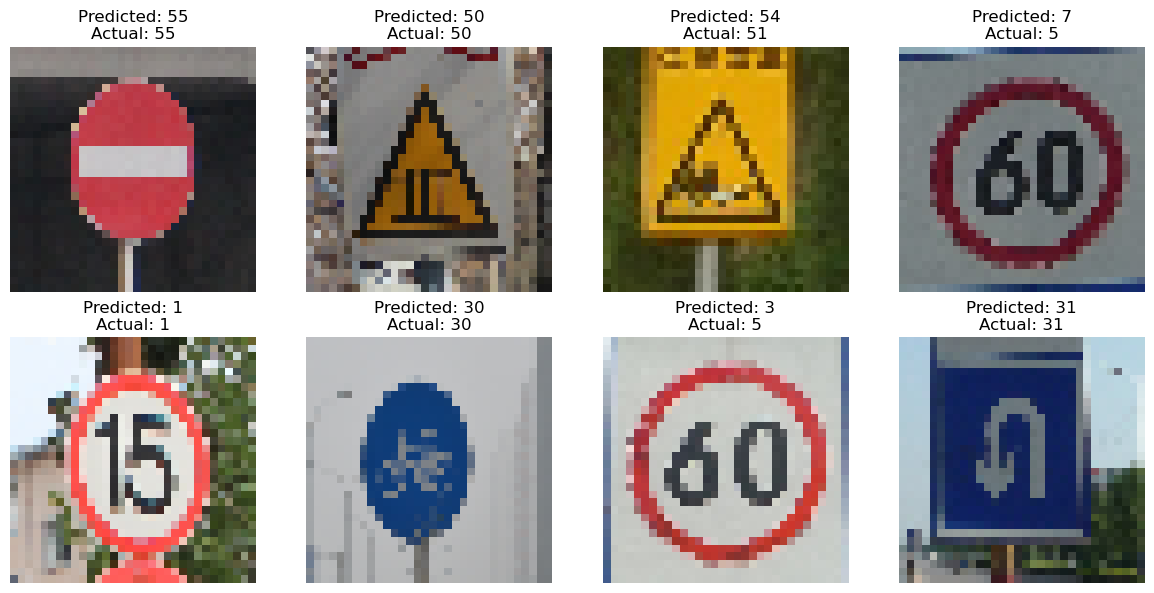

In [8]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from train_datagen
images, labels = next(train_datagen)

# Make predictions on the batch of images
predictions = model_v1.predict(images)

# Display the images with their predicted labels
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].imshow(images[i])
    axs[i].set_title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(labels[i])}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 259ms/step


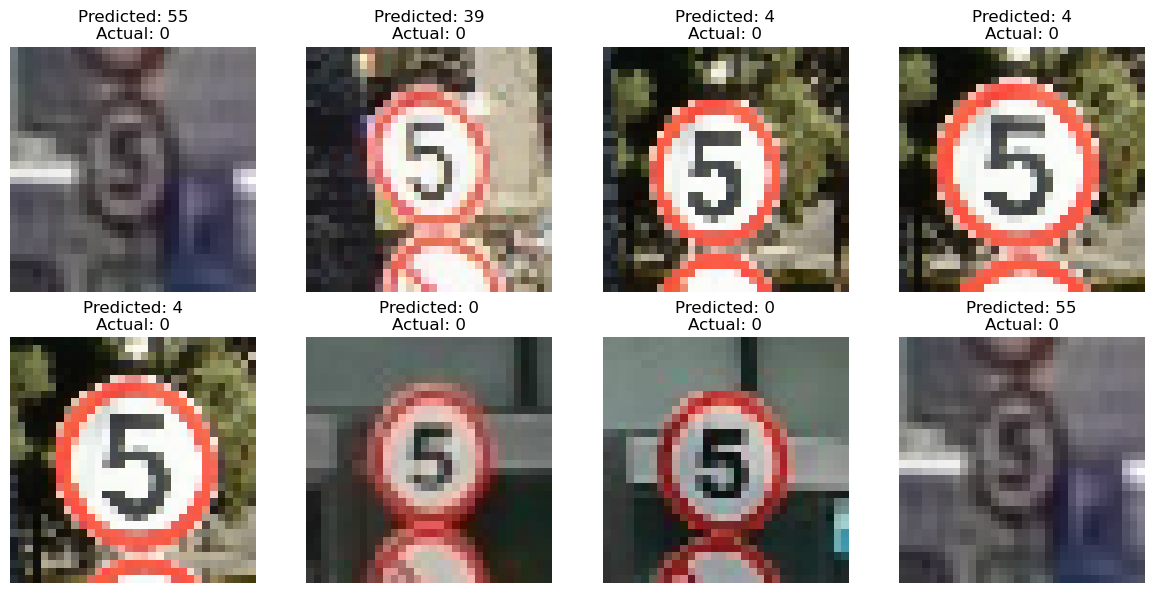

In [9]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from train_datagen
images, labels = next(validation_datagen)

# Make predictions on the batch of images
predictions = model_v1.predict(images)

# Display the images with their predicted labels
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].imshow(images[i])
    axs[i].set_title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(labels[i])}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()